Analysis of Skinvision data

Install all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

Load data from csv

In [2]:
raw_data = pd.read_csv("Senior_Data_Analyst_Assessment_Dataset.csv")

In [3]:
# Preview first 10 rows
display(raw_data.head(10))

,lesion_id,image_id,dx,dx_type,age,sex,localization,clinic_id,device_version,plan_type,sv_recommendation
0,118,27419,bkl,histo,NaN,man,scalp,clinic_7,v2.1,3 months plan,low
1,118,25030,bkl,histo,80.0,male,scalp,clinic_5,dev_prototype,3 months plan,low
2,2730,26769,bkl,histo,80.0,male,scalp,clinic_7,v2.0,year plan,low
3,2730,25661,bkl,histo,NaN,male,scalp,clinic_3,dev_prototype,year plan,low
4,1466,31633,bkl,histo,75.0,male,ear,clinic_4,dev_prototype,year plan,low
5,1466,27850,bkl,histo,75.0,male,ear,clinic_7,v1.1,year plan,low
6,2761,29176,bkl,histo,60.0,Male,face,clinic_2,v2.0,3 months plan,high
7,2761,29068,bkl,histo,60.0,Male,face,clinic_2,v2.0,3 months plan,low
8,5132,25837,bkl,histo,NaN,woman,back,clinic_1,v2.0,3 months plan,low
9,5132,25209,bkl,histo,70.0,female,back,clinic_1,dev_prototype,3 months plan,low


Make a copy of the data to not change the original.

In [4]:
data = raw_data.copy()

## Data Checks

In [5]:
data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization,clinic_id,device_version,plan_type,sv_recommendation
count,10516.000000,10516.000000,10516,10516,8468.000000,9490,9994,10516,10516,10516,10516
unique,NaN,NaN,7,4,NaN,10,20,9,5,3,3
top,NaN,NaN,nv,histo,NaN,male,back,clinic_9,v1.1,single check,low
freq,NaN,NaN,7019,5651,NaN,2500,2198,2254,2137,5784,7464
mean,3776.310099,29323.512933,NaN,NaN,51.701819,NaN,NaN,NaN,NaN,NaN,NaN
std,2197.242016,2891.140536,NaN,NaN,17.036515,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,24306.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1873.750000,26822.750000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3757.500000,29320.500000,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5666.000000,31827.250000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(10516, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10516 entries, 0 to 10515
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lesion_id          10516 non-null  int64  
 1   image_id           10516 non-null  int64  
 2   dx                 10516 non-null  object 
 3   dx_type            10516 non-null  object 
 4   age                8468 non-null   float64
 5   sex                9490 non-null   object 
 6   localization       9994 non-null   object 
 7   clinic_id          10516 non-null  object 
 8   device_version     10516 non-null  object 
 9   plan_type          10516 non-null  object 
 10  sv_recommendation  10516 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 903.8+ KB


In [8]:
data.isna().sum()

lesion_id               0
image_id                0
dx                      0
dx_type                 0
age                  2048
sex                  1026
localization          522
clinic_id               0
device_version          0
plan_type               0
sv_recommendation       0
dtype: int64

In [9]:
data.nunique()

lesion_id             7470
image_id             10015
dx                       7
dx_type                  4
age                     19
sex                     10
localization            20
clinic_id                9
device_version           5
plan_type                3
sv_recommendation        3
dtype: int64

In [10]:
#clearly something weird going on with the sex column, further investigation needed
data["sex"].value_counts()

sex
male       2500
female     2120
Male        888
man         825
M           801
woman       719
F           688
Female      685
Unknown     210
unknown      54
Name: count, dtype: int64

In [11]:
# clearly some overlapping data labels can be seen
data["localization"].value_counts()

localization
back               2198
trunk              1394
upper extremity    1123
lower extremity    1025
lower_extremity    1022
face                752
abdomen             521
stomach             513
chest               412
foot                311
unknown             232
neck                166
scalp               124
hand                 91
ear                  54
genital              46
acral                 7
lower exrtemity       1
trunck                1
arcal                 1
Name: count, dtype: int64

In [12]:
data["age"].value_counts()
#156 has to be an error and 0.0 must be missing values
# for the rest, create an age gategory grouping instead

age
45.0     1121
50.0     1005
55.0      859
40.0      842
60.0      686
35.0      645
70.0      628
65.0      615
75.0      520
30.0      398
80.0      326
85.0      253
25.0      206
20.0      144
5.0        78
15.0       70
10.0       37
0.0        34
156.0       1
Name: count, dtype: int64

## Cleaning the data

before all the clean ups, group data by lesion to avoid missing data issues later

In [13]:
#add a new column for the recommendation
mapping = {
    "unassessable":0,
    "low":1,
    "high":2
}

data["sv_recommendation_numeric"]=data["sv_recommendation"].map(mapping)

In [14]:
def most_frequent(series):
    """Return the most common non-null value."""
    return series.dropna().mode().iloc[0] if not series.dropna().empty else np.nan

def first_nonnull(series):
    """Return the first non-null value."""
    return series.dropna().iloc[0] if not series.dropna().empty else np.nan

In [15]:
agg_dict = {
    "lesion_id":"max",
    "age": "max",
    "sex": most_frequent,
    "localization": most_frequent,
    "sv_recommendation": "max",
    "sv_recommendation_numeric": "max",
    "dx":most_frequent,
    "dx_type": most_frequent,
    "clinic_id": "max",
    "device_version": "max",
    "plan_type": "max",
    "image_id": "count"   # <-- adds image count
}

In [16]:
data = data.groupby("lesion_id").agg(agg_dict)
data.rename(columns={"image_id": "image_count"}, inplace=True)
#data = data.groupby("lesion_id").max().reset_index()
#this cleans all the duplicate images out of the data, but keeps each prediction
#check missing values after

In [17]:
data.isna().sum()

lesion_id                      0
age                          885
sex                          573
localization                 284
sv_recommendation              0
sv_recommendation_numeric      0
dx                             0
dx_type                        0
clinic_id                      0
device_version                 0
plan_type                      0
image_count                    0
dtype: int64

Clean and standardizw the sex column.

In [18]:
# in case there are extra spaces or symbols
data["sex"] = (
    data["sex"]
      .str.strip()
      .str.lower()
      .str.replace(r"[^a-z]", "", regex=True)  # remove non-letters
)


In [19]:
#create a mapping to clean the values for sex
mapping = {
    "male": "male",
    "m": "male",
    "man": "male",
    "Male": "male",

    "female": "female",
    "Female": "female",
    "f": "female",
    "woman": "female",

    "unknown": "unknown",
    "Unknown": "unknown",
    "other": "unknown",
}

#apply the mapping
data["sex"] = data["sex"].str.lower().map(mapping).fillna("unknown")  # fallback



In [20]:
#check the results
data["sex"].value_counts()

sex
male       3615
female     3087
unknown     768
Name: count, dtype: int64

Clean and standardize the localization column.

In [21]:
# in case there are extra symbols
data["localization_cleaned"] = (
    data["localization"]
      .str.strip()
      .str.lower()
      .str.replace(r"[^a-z]", "", regex=True)  # remove non-letters
)

In [22]:
#create a mapping to clean the values for localization
mapping_localization = {
    # --- Head & Neck ---
    "face": "head_neck",
    "scalp": "head_neck",
    "ear": "head_neck",
    "neck": "head_neck",

    # --- Upper Extremity ---
    "upperextremity": "upper_extremity",
    "hand": "upper_extremity",

    # --- Lower Extremity ---
    "lowerextremity": "lower_extremity",
    "lowerexrtemity": "lower_extremity",  # typo
    "foot": "lower_extremity",

    # --- Trunk ---
    "back": "trunk",
    "chest": "trunk",
    "abdomen": "trunk",
    "stomach": "trunk",
    "trunk": "trunk",
    "trunck": "trunk",  # typo

    # --- Genital ---
    "genital": "genital",

    # --- Acral ---
    "acral": "acral",
    "arcal": "acral",   # typo

    # --- Unknown ---
    "unknown": "unknown",
}

#apply the mapping
data["localization_clean"] = (
    data["localization_cleaned"]
        .str.strip()
        .str.lower()
        .map(mapping_localization)
        .fillna("unknown")  # fallback
)

In [23]:
#check the results
#note that we kept the original data in the column localization in case the more detailed information is still needed later
data["localization_clean"].value_counts()

localization_clean
trunk              3732
lower_extremity    1728
upper_extremity     807
head_neck           681
unknown             478
genital              41
acral                 3
Name: count, dtype: int64

Clean and standardize the age column.

In [24]:
data['age'] = data['age'].replace({156: np.nan, 0: np.nan})

In [25]:
#divide into age categories
bins = [0, 18, 35, 50, 65, 80, 200]
labels = [
    "0–17 Children",
    "18–34 Young Adults",
    "35–49 Middle-aged Adults",
    "50–64 Older Adults",
    "65–79 Seniors",
    "80+ Elderly"
]

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [26]:
# handle missing values
data['age_group'] = data['age_group'].cat.add_categories(["Missing"])
data.loc[data['age'].isna(), 'age_group'] = "Missing"

In [27]:
data['age_group'].value_counts()
#check results

age_group
35–49 Middle-aged Adults    2154
50–64 Older Adults          2074
65–79 Seniors               1297
Missing                      906
18–34 Young Adults           520
80+ Elderly                  408
0–17 Children                111
Name: count, dtype: int64

## Export data

In [28]:
#add a new column for the final recommendation
mapping = {
    0: "unassessable",
    1:"low",
    2:"high"
}

data["sv_recommendation_final"]=data["sv_recommendation_numeric"].map(mapping)

In [32]:
#add category for image data
data["image_category"] = np.where(
    data["image_count"] > 3, "4 or more",
    np.where(data["image_count"] > 1, "2-3", "1")
)

In [33]:
data.to_excel('data_uniquelesion.xlsx', index = False)

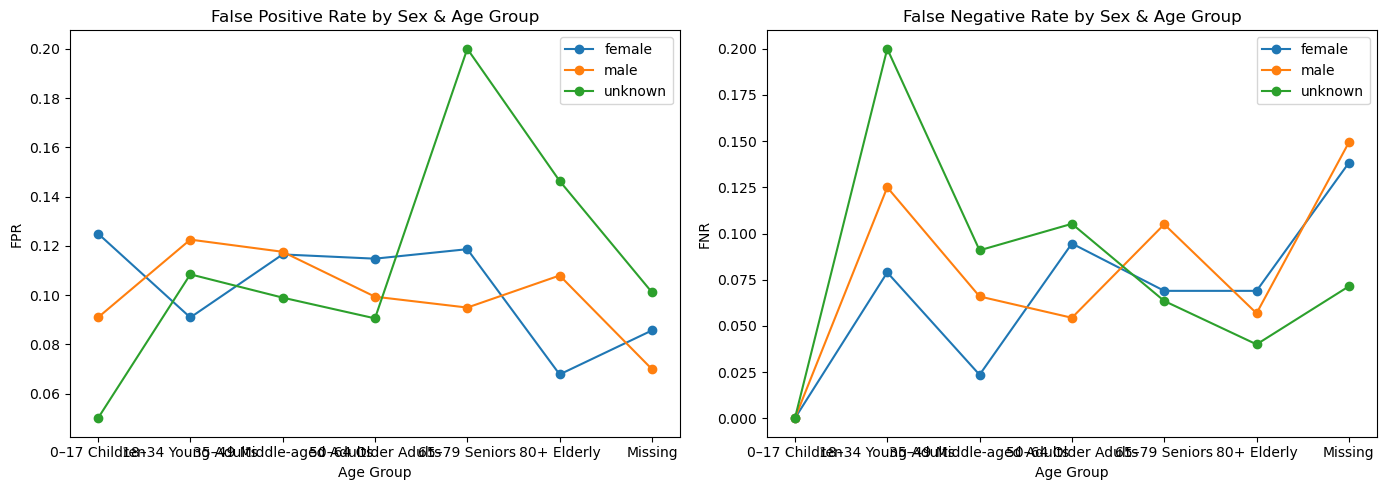

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# FPR plot
for sex in rates["sex"].unique():
    subset = rates[rates["sex"] == sex]
    ax[0].plot(subset["age_group"], subset["FPR"], marker="o", label=sex)

ax[0].set_title("False Positive Rate by Sex & Age Group")
ax[0].set_xlabel("Age Group")
ax[0].set_ylabel("FPR")
ax[0].legend()

# FNR plot
for sex in rates["sex"].unique():
    subset = rates[rates["sex"] == sex]
    ax[1].plot(subset["age_group"], subset["FNR"], marker="o", label=sex)

ax[1].set_title("False Negative Rate by Sex & Age Group")
ax[1].set_xlabel("Age Group")
ax[1].set_ylabel("FNR")
ax[1].legend()

plt.tight_layout()
plt.show()

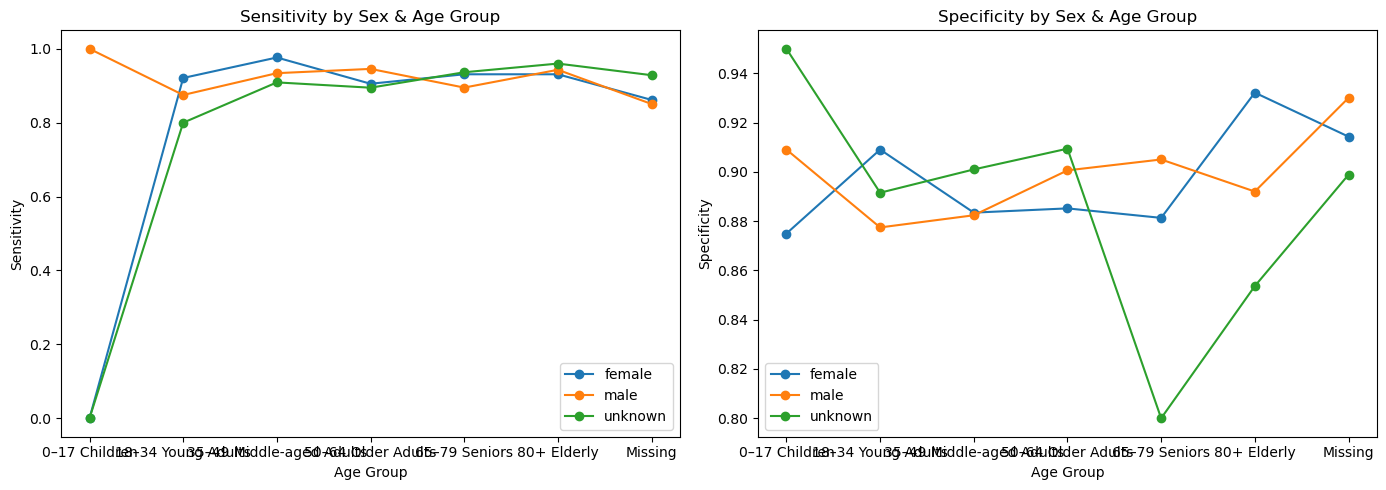

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Sensitivity plot
for sex in rates["sex"].unique():
    subset = rates[rates["sex"] == sex]
    ax[0].plot(subset["age_group"], subset["Sensitivity"], marker="o", label=sex)

ax[0].set_title("Sensitivity by Sex & Age Group")
ax[0].set_xlabel("Age Group")
ax[0].set_ylabel("Sensitivity")
ax[0].legend()

# Specificity plot
for sex in rates["sex"].unique():
    subset = rates[rates["sex"] == sex]
    ax[1].plot(subset["age_group"], subset["Specificity"], marker="o", label=sex)

ax[1].set_title("Specificity by Sex & Age Group")
ax[1].set_xlabel("Age Group")
ax[1].set_ylabel("Specificity")
ax[1].legend()

plt.tight_layout()
plt.show()


In [47]:

# Keep only true negatives and false positives
neg = merged[merged["prediction_class"].isin(["true negative", "false positive"])].copy()

# Create binary outcome: 1 = FP, 0 = TN
neg["is_fp"] = (neg["prediction_class"] == "false positive").astype(int)

# Logistic regression: does sex or age group affect false positive odds?
model_fpr = smf.logit("is_fp ~ C(sex) + C(age_group)", data=neg).fit()

print(model_fpr.summary())

Optimization terminated successfully.
         Current function value: 0.335187
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  is_fp   No. Observations:                 7816
Model:                          Logit   Df Residuals:                     7807
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                0.002478
Time:                        17:21:30   Log-Likelihood:                -2619.8
converged:                       True   LL-Null:                       -2626.3
Covariance Type:            nonrobust   LLR p-value:                    0.1112
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -2.1

In [50]:
# --- FPR MODEL ---
pos = merged[merged["prediction_class"].isin(["true positive", "false negative"])].copy()
pos["is_fn"] = (pos["prediction_class"] == "false negative").astype(int)

model_fnr = smf.logit("is_fn ~ C(sex) + C(age_group)", data=pos).fit()
print("\n=== FNR MODEL ===")
print(model_fnr.summary())

         Current function value: 0.286275
         Iterations: 35

=== FNR MODEL ===
                           Logit Regression Results                           
Dep. Variable:                  is_fn   No. Observations:                 1884
Model:                          Logit   Df Residuals:                     1875
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                 0.01501
Time:                        17:29:41   Log-Likelihood:                -539.34
converged:                      False   LL-Null:                       -547.56
Covariance Type:            nonrobust   LLR p-value:                   0.03650
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -15.5956   2300.541   

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
# --- SENSITIVITY MODEL ---
pos = merged[merged["prediction_class"].isin(["true positive", "false negative"])].copy()
pos["is_tp"] = (pos["prediction_class"] == "true positive").astype(int)

model_sensitivity = smf.logit("is_tp ~ C(sex) + C(age_group)", data=pos).fit()
print("\n=== SENSITIVITY MODEL ===")
print(model_sensitivity.summary())

         Current function value: 0.286275
         Iterations: 35

=== SENSITIVITY MODEL ===
                           Logit Regression Results                           
Dep. Variable:                  is_tp   No. Observations:                 1884
Model:                          Logit   Df Residuals:                     1875
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                 0.01501
Time:                        17:31:27   Log-Likelihood:                -539.34
converged:                      False   LL-Null:                       -547.56
Covariance Type:            nonrobust   LLR p-value:                   0.03650
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   15.5958   230

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
# --- SPECIFICITY MODEL ---
neg = merged[merged["prediction_class"].isin(["true negative", "false positive"])].copy()
neg["is_tn"] = (neg["prediction_class"] == "true negative").astype(int)

model_specificity = smf.logit("is_tn ~ C(sex) + C(age_group)", data=neg).fit()
print("\n=== SPECIFICITY MODEL ===")
print(model_specificity.summary())

Optimization terminated successfully.
         Current function value: 0.335187
         Iterations 6

=== SPECIFICITY MODEL ===
                           Logit Regression Results                           
Dep. Variable:                  is_tn   No. Observations:                 7816
Model:                          Logit   Df Residuals:                     7807
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                0.002478
Time:                        17:31:34   Log-Likelihood:                -2619.8
converged:                       True   LL-Null:                       -2626.3
Covariance Type:            nonrobust   LLR p-value:                    0.1112
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept            

In [53]:
def plot_odds_ratios(model, title):
    # Extract coefficients & convert to odds ratios
    params = model.params
    conf = model.conf_int()
    OR = np.exp(params)
    CI_lower = np.exp(conf[0])
    CI_upper = np.exp(conf[1])

    results = pd.DataFrame({
        "OR": OR,
        "CI_lower": CI_lower,
        "CI_upper": CI_upper
    })
    results = results.drop("Intercept")  # remove intercept for plotting

    # Plot
    plt.figure(figsize=(7, 4))
    plt.errorbar(results["OR"], results.index,
                 xerr=[results["OR"] - results["CI_lower"],
                       results["CI_upper"] - results["OR"]],
                 fmt='o')
    plt.axvline(1, color='grey', linestyle='--')
    plt.title(title)
    plt.xlabel("Odds Ratio (logistic regression)")
    plt.show()

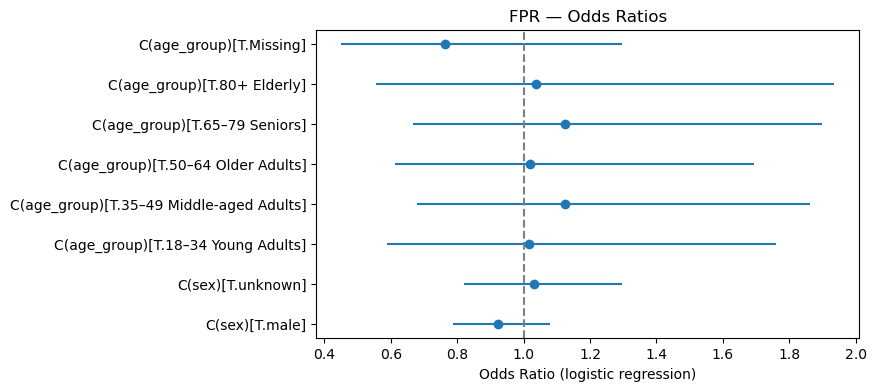

C:\Users\jonna\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


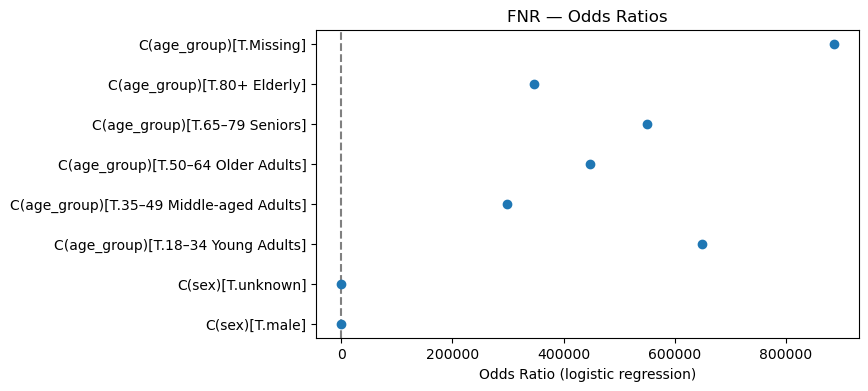

C:\Users\jonna\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


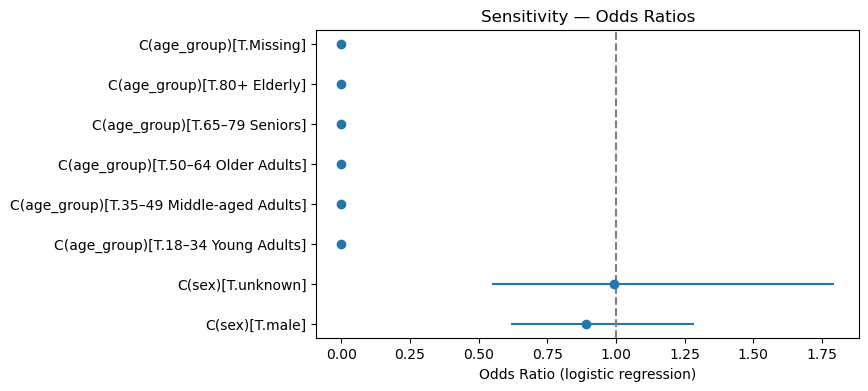

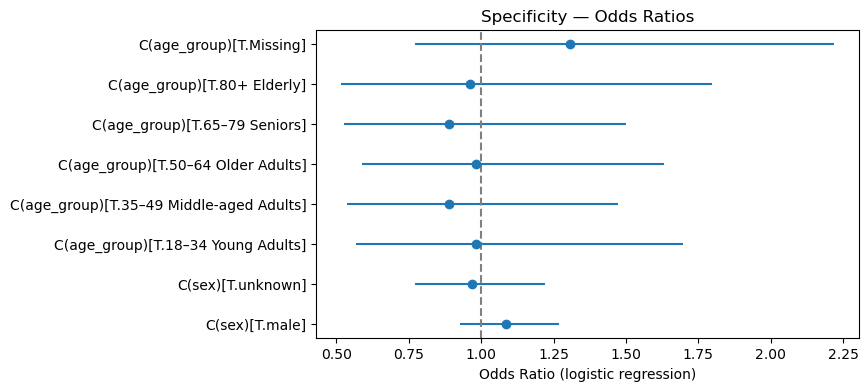

In [54]:
plot_odds_ratios(model_fpr, "FPR — Odds Ratios")
plot_odds_ratios(model_fnr, "FNR — Odds Ratios")
plot_odds_ratios(model_sensitivity, "Sensitivity — Odds Ratios")
plot_odds_ratios(model_specificity, "Specificity — Odds Ratios")

In [57]:
metrics = merged.groupby(["sex", "age_group"])["prediction_class"].value_counts().unstack(fill_value=0)

metrics["FPR"] = metrics["false positive"] / (metrics["false positive"] + metrics["true negative"])
metrics["FNR"] = metrics["false negative"] / (metrics["false negative"] + metrics["true positive"])
metrics["Sensitivity"] = 1 - metrics["FNR"]
metrics["Specificity"] = 1 - metrics["FPR"]

metrics.reset_index(inplace=True)

C:\Users\jonna\AppData\Local\Temp\ipykernel_29756\1635041483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metrics = merged.groupby(["sex", "age_group"])["prediction_class"].value_counts().unstack(fill_value=0)


C:\Users\jonna\AppData\Local\Temp\ipykernel_29756\2304322899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)
C:\Users\jonna\AppData\Local\Temp\ipykernel_29756\2304322899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)
C:\Users\jonna\AppData\Local\Temp\ipykernel_29756\2304322899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)
C:\Users\jonna\AppData\Local\Temp\ipykernel_29756\2304322899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=45)


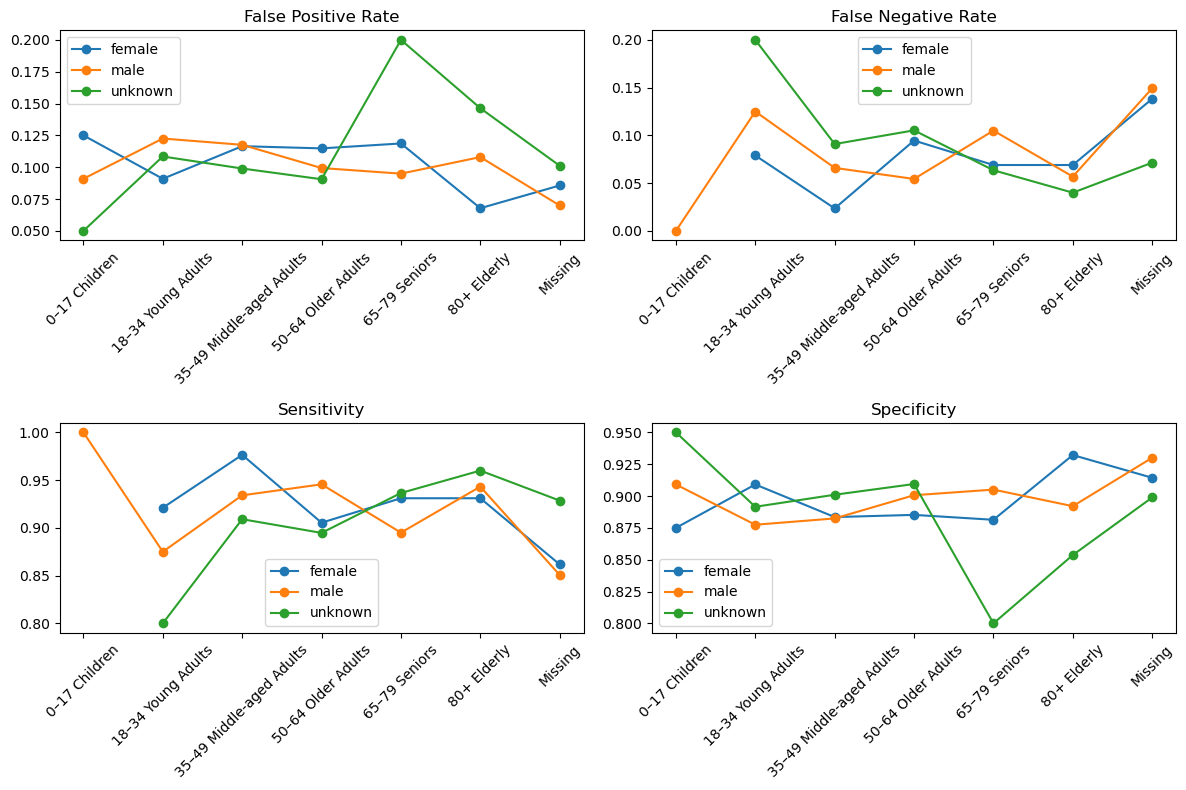

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for sex in metrics["sex"].unique():
    subset = metrics[metrics["sex"] == sex]
    ax[0,0].plot(subset["age_group"], subset["FPR"], marker="o", label=sex)
    ax[0,1].plot(subset["age_group"], subset["FNR"], marker="o", label=sex)
    ax[1,0].plot(subset["age_group"], subset["Sensitivity"], marker="o", label=sex)
    ax[1,1].plot(subset["age_group"], subset["Specificity"], marker="o", label=sex)

ax[0,0].set_title("False Positive Rate")
ax[0,1].set_title("False Negative Rate")
ax[1,0].set_title("Sensitivity")
ax[1,1].set_title("Specificity")

for a in ax.flat:
    a.legend()
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [34]:
merged['SeriousBenign'].value_counts()
merged.groupby('age_group')['SeriousBenign'].value_counts(normalize=True)

C:\Users\jonna\AppData\Local\Temp\ipykernel_31152\3798776156.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby('age_group')['SeriousBenign'].value_counts(normalize=True)


age_group                 SeriousBenign  
0–17 Children             Possibly Benign    0.945946
                          Benign             0.048649
                          Cancer             0.005405
                          Precancerous       0.000000
18–34 Young Adults        Possibly Benign    0.893048
                          Cancer             0.078877
                          Benign             0.028075
                          Precancerous       0.000000
35–49 Middle-aged Adults  Possibly Benign    0.855061
                          Cancer             0.072469
                          Benign             0.066334
                          Precancerous       0.006135
50–64 Older Adults        Possibly Benign    0.689412
                          Cancer             0.144706
                          Benign             0.130588
                          Precancerous       0.035294
65–79 Seniors             Possibly Benign    0.397050
                          Cancer        

## Check differences with sex and localization


In [59]:
#calculate and visualize false positive rate and false negative rate per age group and sex?
def compute_rates(group):

    group = group["prediction_class"]
    
    TP = (group == "true positive").sum()
    TN = (group == "true negative").sum()
    FP = (group == "false positive").sum()
    FN = (group == "false negative").sum()

    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) > 0 else 0
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    return pd.Series({
        "FPR": FPR,
        "FNR": FNR,
        "Sensitivity": sensitivity,
        "Specificity": specificity
    })

rates = (merged.groupby(["sex", "localization_clean"]).apply(compute_rates).reset_index())

C:\Users\jonna\AppData\Local\Temp\ipykernel_29756\390076616.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rates = (merged.groupby(["sex", "localization_clean"]).apply(compute_rates).reset_index())


In [60]:
# Keep only true negatives and false positives
neg = merged[merged["prediction_class"].isin(["true negative", "false positive"])].copy()

# Create binary outcome: 1 = FP, 0 = TN
neg["is_fp"] = (neg["prediction_class"] == "false positive").astype(int)

# Logistic regression: does sex or age group affect false positive odds?
model_fpr = smf.logit("is_fp ~ C(sex) + C(localization_clean)", data=neg).fit()

print(model_fpr.summary())

         Current function value: 0.335648
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  is_fp   No. Observations:                 7816
Model:                          Logit   Df Residuals:                     7807
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                0.001106
Time:                        17:50:00   Log-Likelihood:                -2623.4
converged:                      False   LL-Null:                       -2626.3
Covariance Type:            nonrobust   LLR p-value:                    0.6688
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -22.8269   3.31e+04     -0.001      0.999

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
# --- FPR MODEL ---
pos = merged[merged["prediction_class"].isin(["true positive", "false negative"])].copy()
pos["is_fn"] = (pos["prediction_class"] == "false negative").astype(int)

model_fnr = smf.logit("is_fn ~ C(sex) + C(localization_clean)", data=pos).fit()
print("\n=== FNR MODEL ===")
print(model_fnr.summary())

Optimization terminated successfully.
         Current function value: 0.290129
         Iterations 7

=== FNR MODEL ===
                           Logit Regression Results                           
Dep. Variable:                  is_fn   No. Observations:                 1884
Model:                          Logit   Df Residuals:                     1877
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                0.001751
Time:                        17:51:36   Log-Likelihood:                -546.60
converged:                       True   LL-Null:                       -547.56
Covariance Type:            nonrobust   LLR p-value:                    0.9271
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                    

In [62]:
# --- SENSITIVITY MODEL ---
pos = merged[merged["prediction_class"].isin(["true positive", "false negative"])].copy()
pos["is_tp"] = (pos["prediction_class"] == "true positive").astype(int)

model_sensitivity = smf.logit("is_tp ~ C(sex) + C(localization_clean)", data=pos).fit()
print("\n=== SENSITIVITY MODEL ===")
print(model_sensitivity.summary())

Optimization terminated successfully.
         Current function value: 0.290129
         Iterations 7

=== SENSITIVITY MODEL ===
                           Logit Regression Results                           
Dep. Variable:                  is_tp   No. Observations:                 1884
Model:                          Logit   Df Residuals:                     1877
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                0.001751
Time:                        17:51:44   Log-Likelihood:                -546.60
converged:                       True   LL-Null:                       -547.56
Covariance Type:            nonrobust   LLR p-value:                    0.9271
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept            

In [63]:
# --- SPECIFICITY MODEL ---
neg = merged[merged["prediction_class"].isin(["true negative", "false positive"])].copy()
neg["is_tn"] = (neg["prediction_class"] == "true negative").astype(int)

model_specificity = smf.logit("is_tn ~ C(sex) + C(localization_clean)", data=neg).fit()
print("\n=== SPECIFICITY MODEL ===")
print(model_specificity.summary())

         Current function value: 0.335648
         Iterations: 35

=== SPECIFICITY MODEL ===
                           Logit Regression Results                           
Dep. Variable:                  is_tn   No. Observations:                 7816
Model:                          Logit   Df Residuals:                     7807
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                0.001106
Time:                        17:52:16   Log-Likelihood:                -2623.4
converged:                      False   LL-Null:                       -2626.3
Covariance Type:            nonrobust   LLR p-value:                    0.6688
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   22.9025   3.4

C:\Users\jonna\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\jonna\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


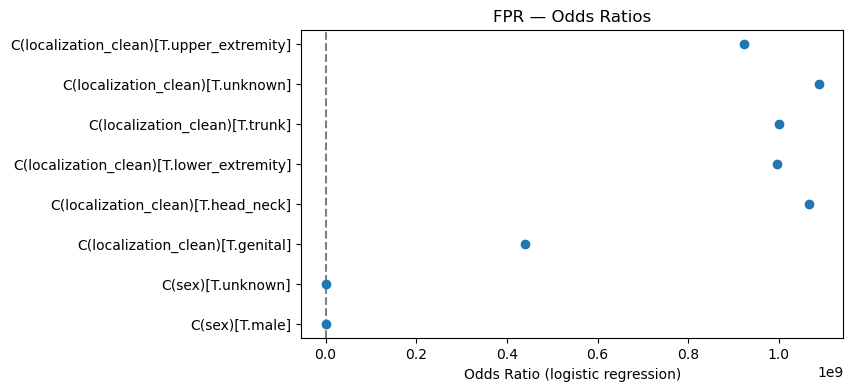

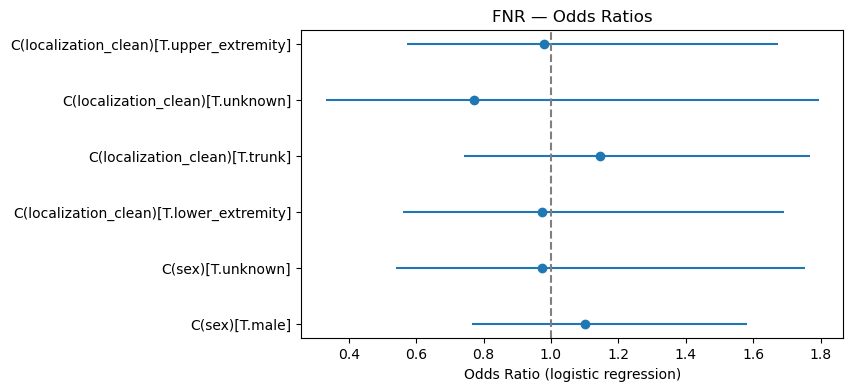

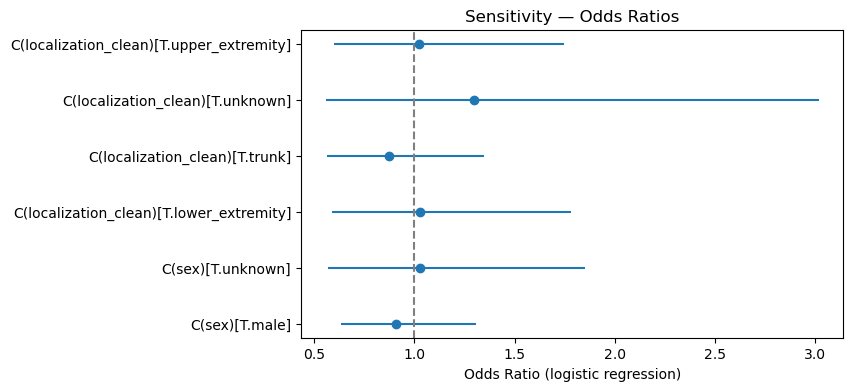

C:\Users\jonna\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


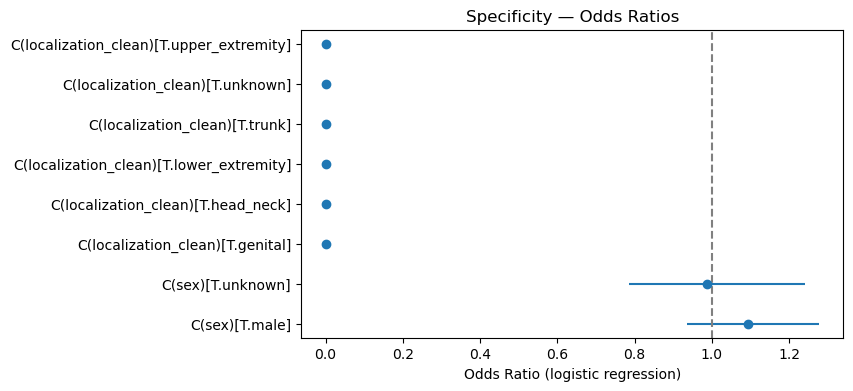

In [64]:
plot_odds_ratios(model_fpr, "FPR — Odds Ratios")
plot_odds_ratios(model_fnr, "FNR — Odds Ratios")
plot_odds_ratios(model_sensitivity, "Sensitivity — Odds Ratios")
plot_odds_ratios(model_specificity, "Specificity — Odds Ratios")

## Export the data to excel for visualization in Power BI

In [46]:
data_uniqueimage.to_excel('data_cleaned.xlsx', index = False)

In [ ]:
data_uniqueimage.to_excel('data_uniqueimage.xlsx', index = False)